# Data Storytelling

## Part 3 Sentiment Analysis and Ratings
We want to handle rating per review, to define the consistency among opinion and rating score assigned by users. In this section, we use scrapping data from 3 webpages of Yelp, saved in the folder **Data_Extraction** as *reviews_rating.csv*
(This is the continuation of the notebook called *Sentiment_analyzer.ipynb*, that uses **TextBlob** to get *polarity* and *subjectivity* from sentences and discuss the relation between two patterns)

First part is exactly the same:

Importing all relevant packages

In [223]:
from textblob.sentiments import PatternAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

We are using the sentiment function from TextBlob library to study *polarity* and *subjectivity* of data. According this function, *polarity* is between **-1 (negative result)** and **1 (positive result)** and *subjectivity* is between **0 (no subjective)** and **1 (absolutely subjective)**

In [224]:
def sentiment_parameters_Pattern(sentence):
    blob = TextBlob(sentence, analyzer=PatternAnalyzer())
    return blob.sentiment.polarity, blob.sentiment.subjectivity

Reading Data

In [225]:
df = pd.read_csv("../Data_Extraction/reviews_rating.csv", usecols=['Description','Rating'])

In [226]:
df.head()

,Description,Rating
0,$6.50 for a turmeric matcha seems a bit steep ...,3.0 star rating
1,It's not a far cry to say it's one of my favor...,5.0 star rating
2,"This place is fantastic - for coffee, toast, a...",5.0 star rating
3,Stopped in on our way out of San Fran because ...,4.0 star rating
4,Cute very friendly coffee shop on Divis. I got...,5.0 star rating


Cleaning Rating Serie

In [227]:
df['score'] = df['Rating'].str.split(' star rating').str.get(0)

In [228]:
score = []
reviews = []
polarity_Pattern = []
subjectivity_Pattern = []

Calculating *polarity* and *subjectivity*

In [229]:
for i in range(df.shape[0]):
    review = df.iloc[i, 0]
    p, s = sentiment_parameters_Pattern(review)
    score.append(float(df.iloc[i, 2]))
    polarity_Pattern.append(p)
    subjectivity_Pattern.append(s)

In [230]:
data_story = {'Review': df['Description'], 'Rating': score, 
              'Polarity_Pattern': polarity_Pattern, 
              'Subjectivity_Pattern': subjectivity_Pattern}
df_story = pd.DataFrame(data_story)

In [231]:
df_story.head()

,Review,Rating,Polarity_Pattern,Subjectivity_Pattern
0,$6.50 for a turmeric matcha seems a bit steep ...,3.0,0.142308,0.411722
1,It's not a far cry to say it's one of my favor...,5.0,0.265385,0.661538
2,"This place is fantastic - for coffee, toast, a...",5.0,0.531685,0.801014
3,Stopped in on our way out of San Fran because ...,4.0,0.288333,0.631667
4,Cute very friendly coffee shop on Divis. I got...,5.0,0.449643,0.675714


Now, we have a spectrum more huge of data (87 coffee shops) and we discover that *subjectivity* is distributed between 0 and 1, it means it does not depend on rating. About the density of data, it is rasing with the coffee score, implies that there are more reviews assigning high score than lower.

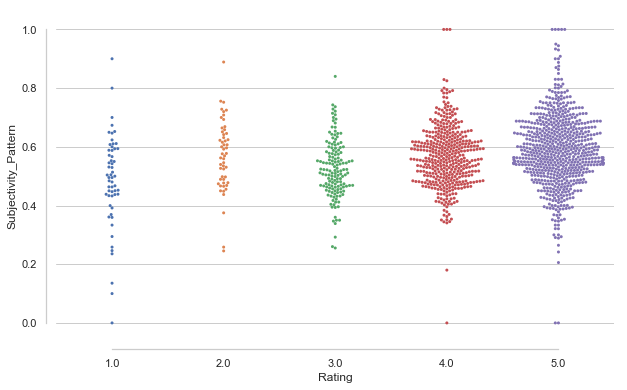

In [237]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(10, 6))
g = sns.swarmplot(x="Rating", y="Subjectivity_Pattern", size=3, data=df_story1)
sns.despine(offset=10, trim=True)

*Polarity* has a clear tendency to increase his pattern score meanwhile rating lift up. For rating 1, almost all *polarity* points are between -0.25 and 0.25, revealing slightly negative, positive and neutral reviews. Rating 2 is moving slightly higher while rating 4 and 5 are mainly between 0 and 0.75. It makes sense because better rating must imply a better appreciation of the experience in the coffee shop.

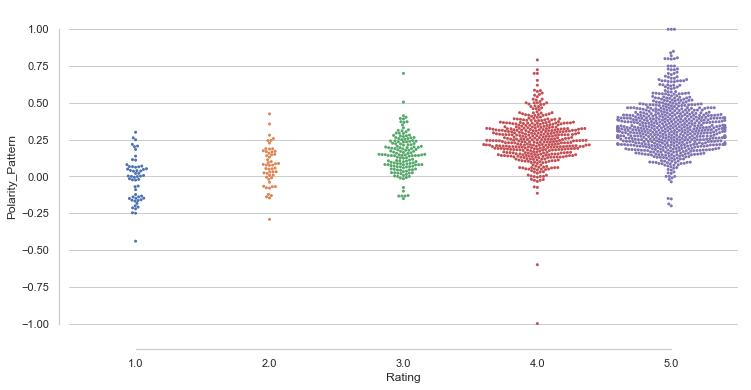

In [241]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 6))
sns.swarmplot(x="Rating", y="Polarity_Pattern", size=3, data=df_story1)
sns.despine(offset=10, trim=True)

Could we put all data together? We divide subjectivity data in 4 groups and add this information as *hue* parameter in the last chart. Group 1 contains *subjectivity* range $ [0.75, 1] $, follows to group 2 ($ [0.5, 0.75[ $), group 3 ($ [0.25, 0.5[ $) and group 4 ($ [0, 0.25[ $)

In [242]:
groups = df_story1['Subjectivity_Pattern'].apply(lambda n: 1 if n>=0.75 else(2 if n >=0.5 else(3 if n>=0.25 else 4)))

In [243]:
df_story1['Subject_groups'] = groups

In [262]:
df_story1.head()

,Review,Rating,Polarity_Pattern,Subjectivity_Pattern,Subject_groups
0,$6.50 for a turmeric matcha seems a bit steep ...,3.0,0.142308,0.411722,3
1,It's not a far cry to say it's one of my favor...,5.0,0.265385,0.661538,2
2,"This place is fantastic - for coffee, toast, a...",5.0,0.531685,0.801014,1
3,Stopped in on our way out of San Fran because ...,4.0,0.288333,0.631667,2
4,Cute very friendly coffee shop on Divis. I got...,5.0,0.449643,0.675714,2


And now, we can find subjectivity scores in the same chart. Most *subjectivity* data is founded in rating 5 and then in rating 4. Fewer *subjectivity* reviews are limited, with a couple of appearances in all columns, except rating 3. Reviews are not extremely subjective any completely objective. The density of *subjectivity* data is superior in the highest scores assigned by users.

In [271]:
df_story1[(df_story1['Rating']==3) & (df_story1['Subject_groups'] == 4)]

,Review,Rating,Polarity_Pattern,Subjectivity_Pattern,Subject_groups


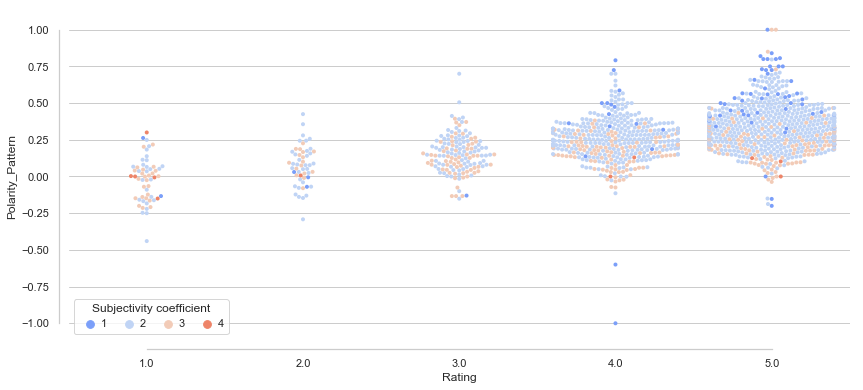

In [273]:
f, ax = plt.subplots(figsize=(14, 6))
sns.set_style("whitegrid")
sns.swarmplot(x="Rating", y="Polarity_Pattern", hue="Subject_groups", size=4, data=df_story1, palette="coolwarm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Subjectivity coefficient",
          handletextpad=0, columnspacing=1,
          loc="lower left", ncol=4, frameon=True)
sns.despine(offset=10, trim=True)

If you are wonder how much data per rating score there is here, we show you that in the following histogram:

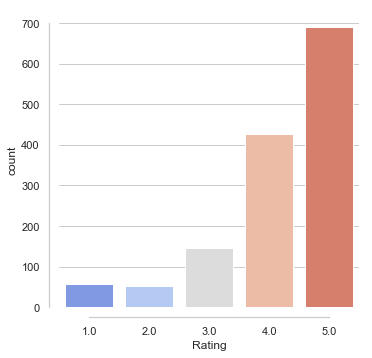

In [277]:
sns.catplot(x="Rating", kind="count", palette="coolwarm", data=df_story1)
sns.despine(offset=10, trim=True)

And finally, we are wondering **what people is talking about coffee**. We will do a quickly inspection to find some relevant words in the with highest and lowest scores.

In [305]:
df_rating1 = df_story1[(df_story1['Rating']==1)]
df_rating1.head(15)

,Review,Rating,Polarity_Pattern,Subjectivity_Pattern,Subject_groups
60,"Folks, avoid this place unless you like being ...",1.0,0.070000,0.607778,2
77,I have been a Réveille customer since they ope...,1.0,0.002679,0.246429,4
140,DON'T get the breakfast sandwich. Go down a co...,1.0,-0.123148,0.495370,3
146,Ok we came here because of all the positive re...,1.0,0.138312,0.673377,2
217,They must be writing their own reviews. No Wi...,1.0,0.114141,0.649495,2
227,College student here and I always come to this...,1.0,0.065336,0.587675,2
231,$7 for a small cup of leaf water? Lmfao. Staff...,1.0,-0.025000,0.450000,3
238,I used to go to this place a few times a week ...,1.0,-0.148333,0.463333,3
242,Save your money. Gave this place two tries and...,1.0,-0.148127,0.438342,3
291,So disappointed. The outside of the coffee sho...,1.0,0.067071,0.542475,2


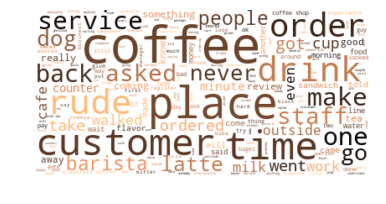

In [303]:
text = ' '.join(df_rating1['Review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white", 
                      max_font_size=60, normalize_plurals=True, 
                      colormap='copper').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [306]:
df_rating5 = df_story1[(df_story1['Rating']==5)]
df_rating5.head(15)

,Review,Rating,Polarity_Pattern,Subjectivity_Pattern,Subject_groups
1,It's not a far cry to say it's one of my favor...,5.0,0.265385,0.661538,2
2,"This place is fantastic - for coffee, toast, a...",5.0,0.531685,0.801014,1
4,Cute very friendly coffee shop on Divis. I got...,5.0,0.449643,0.675714,2
6,I come here a couple of times a week before my...,5.0,0.415000,0.750000,1
7,I really loved Native Twins! I just stopped in...,5.0,0.333333,0.560000,2
8,The lattes at Native Twins are absolute perfec...,5.0,0.362879,0.543421,2
9,Okay so there are several coffee places to cho...,5.0,0.225641,0.490533,3
10,Love this spot. Pretty small but with a large ...,5.0,0.226929,0.702857,2
11,One of my favorite coffee shops in the city! T...,5.0,0.493217,0.791171,1
12,"I love Native Twins. Their coffee is amazing, ...",5.0,0.308929,0.475595,3


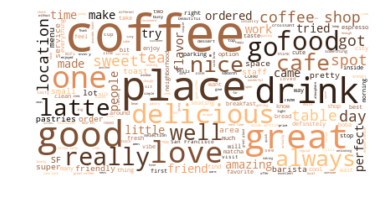

In [308]:
text = ' '.join(df_rating5['Review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white", 
                      max_font_size=60, normalize_plurals=True, 
                      colormap='copper').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the first case, we found words as *never*, *rude*, *away*, *hard* while in the second case there are other as *love*, *good*, *great*, *nice* and *perfect*. 

In summary, reviews in blogs and Yelp give us a lot of information to discover what are people saying about their experience. In the next stage, we will deep more on the causes that generate bad scores, using TF-IFD model to extract key phrases from customers reviews. 

We know which **items in the coffee experience have special attention in blogs**: types of drinks, pastries, small baked elements, information about the roasting source, decoration inside of the coffee shop, views and landscape outside and information about the dynamic of the coffee shop. We visualized **word clouds** to each category looking for the most **meaningful words**.

Furthermore, we inspected **polarity** and **subjectivity** in reviews and discovered a clear tendency to increase the subjectivity with comments with positive polarity. Using rating averages, we saw that negative polarity appears in the lowest rating averages. We got neutral and negative polarity in all rating scores analyzed, but in general, higher rating meaning more positive polarity and more subjectivity.

In the same context, but using almost 90 coffee shops, we determine that **subjectivity does not depend on rating score**, but is not the case of **polarity**, which range is **moving up while the rating score increase**. Finally, we filtered reviews per score and we built **word clouds** with the lowest and higher ratings and discovered clear positive and negative connotations on graphic visualizations.